In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('WineQuality.csv',sep=';')

In [3]:
dataset.shape

(1599, 12)

In [4]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Check if the columns contains any NaN.
#print(dataset.isnull().any)

In [7]:
# Dividet the dataset into fetaures and lables: 
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
             'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = dataset['quality'].values
print(X)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


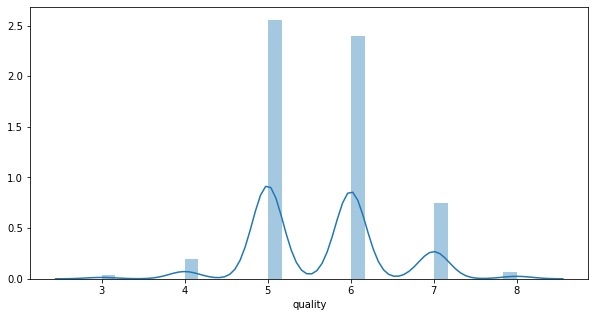

In [8]:
# Know the lable [quality] average 

import seaborn as seabornInstance
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(dataset['quality'])

            Average values of the qaulity of the wine. 

             Observe that most ofhte time the valu is either 5 or 6. 

In [9]:
# Split the dataset for training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test= train_test_split(X,y, random_state=0)

In [10]:
# Fit the model.
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# In the case of MultiVariate Linear Regression , the regression model should find the most optimal coefficients for
# all the attributes. 

# print(regressor.coef_)
X_attr = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
             'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]
coef_df = pd.DataFrame(regressor.coef_, X_attr.columns , columns=['Coefficient'])
coef_df


,Coefficient
fixed acidity,0.022667
volatile acidity,-1.209251
citric acid,-0.156071
residual sugar,0.022481
chlorides,-1.838563
free sulfur dioxide,0.002652
total sulfur dioxide,-0.002895
density,-19.802398
pH,-0.383857
sulphates,0.855723


From above : A unit increase in "density", there is a decrease of 19.80 units in the quality of the wine. 
             Similarly, a unit increase in 'chlorides' , there is a decrese of 1.8 units in the quality.  

In [14]:
# Predit the test Results 

y_predict= regressor.predict(X_test)

In [16]:
df = pd.DataFrame({'Actual':y_test, 'Predict':y_predict})
df1 = df.head(30)
df1

,Actual,Predict
0,6,5.773352
1,5,5.036151
2,7,6.575663
3,6,5.357003
4,5,5.913838
5,6,5.037362
6,5,5.398458
7,6,6.020533
8,4,4.844700
9,5,4.963778


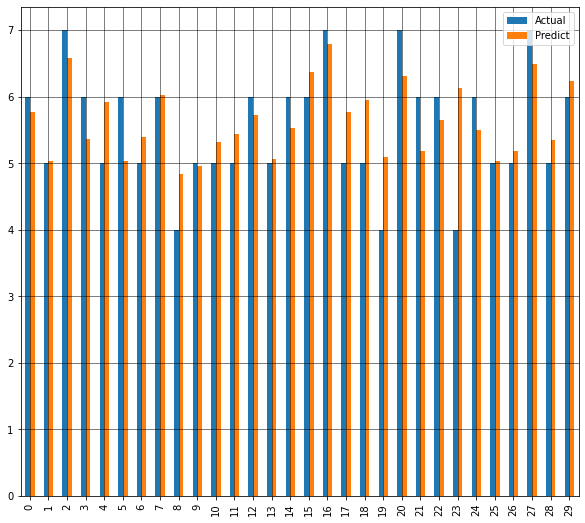

In [17]:
df1.plot(kind='bar', figsize=(10,9))
plt.grid(which= 'major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which= 'major', linestyle='-', linewidth='0.5', color='black')
plt.show()


In [20]:
# Lets evaluate the model.
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.4844748078940059
Mean Squared Error: 0.40007252708505653
Root Mean Squared Error: 0.6325128671300344


# Conclusion:

 Root Mean Squared Error is 0.63 which is slightly greater than 10% of the mean value which is 5.63. 
 This means that our algorothim was not accurate but still make reasonably good predictions.. 